In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("/content/shoe.csv",sep=',')

In [3]:
df.head()

,size(cm),class(y)
0,9.500,Female
1,10.125,Male
2,10.410,Male
3,9.810,Female
4,11.050,Male


In [4]:
df.isnull().sum()

,0
size(cm),0
class(y),0


In [5]:
df.shape

(40, 2)

In [6]:
df['class(y)'].value_counts()

,count
class(y),
Male,22
Female,18


# **Label Encoder**

In [7]:
le = LabelEncoder()
df['class(y)'] = le.fit_transform(df['class(y)'])
df.head()

,size(cm),class(y)
0,9.500,0
1,10.125,1
2,10.410,1
3,9.810,0
4,11.050,1


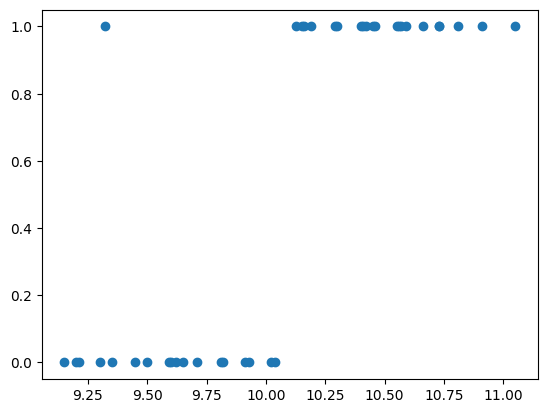

In [8]:
plt.scatter(df['size(cm)'],df['class(y)'])

In [9]:
x = df.drop('class(y)',axis = 1)

In [10]:
y = df['class(y)']

In [11]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=0.75,random_state=10)

In [12]:
lreg = LogisticRegression()
lreg.fit(xtrain,ytrain)

LogisticRegression()

In [13]:
lreg.score(xtest,ytest)

0.9

In [14]:
lreg.score(xtrain,ytrain)

0.9333333333333333

In [15]:
df['predicted'] = lreg.predict(df[['size(cm)']])
df.head()

,size(cm),class(y),predicted
0,9.500,0,0
1,10.125,1,1
2,10.410,1,1
3,9.810,0,0
4,11.050,1,1


In [16]:
lreg.coef_

array([[2.27769017]])

In [17]:
lreg.intercept_

array([-22.63229419])

In [18]:
np.array(df['class(y)'])

array([0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1])

In [19]:
lreg.predict(x)

array([0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0])

In [20]:
lreg.predict_proba(x)

array([[0.72992411, 0.27007589],
       [0.39428901, 0.60571099],
       [0.25379747, 0.74620253],
       [0.57154405, 0.42845595],
       [0.07336028, 0.92663972],
       [0.8571024 , 0.1428976 ],
       [0.75177884, 0.24822116],
       [0.19109807, 0.80890193],
       [0.62619385, 0.37380615],
       [0.65759253, 0.34240747],
       [0.56595754, 0.43404246],
       [0.24950812, 0.75049188],
       [0.35953829, 0.64046171],
       [0.09820717, 0.90179283],
       [0.19823901, 0.80176099],
       [0.14096218, 0.85903782],
       [0.45260241, 0.54739759],
       [0.50370763, 0.49629237],
       [0.3040862 , 0.6959138 ],
       [0.18415528, 0.81584472],
       [0.38077476, 0.61922524],
       [0.79181342, 0.20818658],
       [0.84257912, 0.15742088],
       [0.16139527, 0.83860473],
       [0.67280842, 0.32719158],
       [0.2328398 , 0.7671602 ],
       [0.3089276 , 0.6910724 ],
       [0.1203059 , 0.8796941 ],
       [0.23693306, 0.76306694],
       [0.14096218, 0.85903782],
       [0.

# **Decision Boundary for Logistic Regression**

In [22]:
lreg.predict_proba(x)[:,1]

array([0.27007589, 0.60571099, 0.74620253, 0.42845595, 0.92663972,
       0.1428976 , 0.24822116, 0.80890193, 0.37380615, 0.34240747,
       0.43404246, 0.75049188, 0.64046171, 0.90179283, 0.80176099,
       0.85903782, 0.54739759, 0.49629237, 0.6959138 , 0.81584472,
       0.61922524, 0.20818658, 0.15742088, 0.83860473, 0.32719158,
       0.7671602 , 0.6910724 , 0.8796941 , 0.76306694, 0.85903782,
       0.55865744, 0.48490844, 0.74186481, 0.31233071, 0.62458092,
       0.1900361 , 0.16046562, 0.80535629, 0.31724352, 0.19714703])

In [23]:
lreg.predict_proba(x)[:,0]

array([0.72992411, 0.39428901, 0.25379747, 0.57154405, 0.07336028,
       0.8571024 , 0.75177884, 0.19109807, 0.62619385, 0.65759253,
       0.56595754, 0.24950812, 0.35953829, 0.09820717, 0.19823901,
       0.14096218, 0.45260241, 0.50370763, 0.3040862 , 0.18415528,
       0.38077476, 0.79181342, 0.84257912, 0.16139527, 0.67280842,
       0.2328398 , 0.3089276 , 0.1203059 , 0.23693306, 0.14096218,
       0.44134256, 0.51509156, 0.25813519, 0.68766929, 0.37541908,
       0.8099639 , 0.83953438, 0.19464371, 0.68275648, 0.80285297])

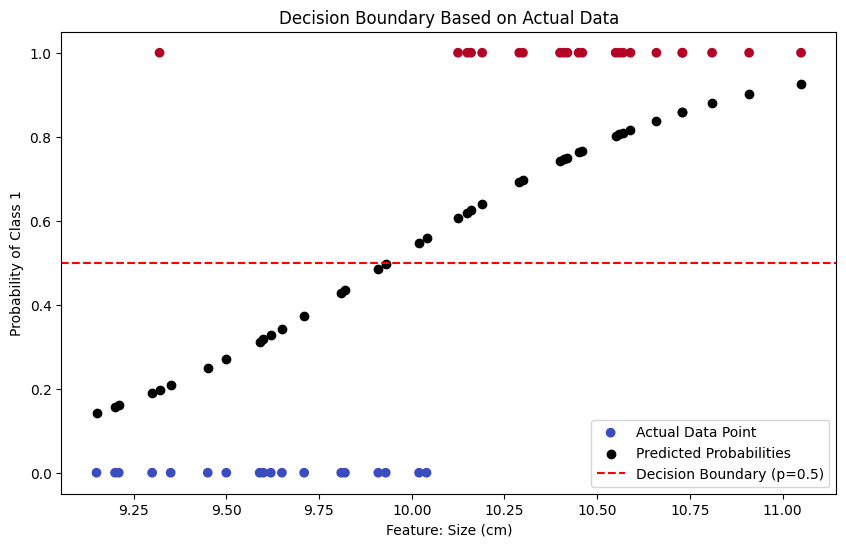

In [24]:
y_prob = lreg.predict_proba(x)[:,1]

plt.figure(figsize=(10,6))

plt.scatter(df['size(cm)'],y,c=y,cmap='coolwarm',label='Actual Data Point')

plt.scatter(df['size(cm)'],y_prob,color='black',label='Predicted Probabilities')

plt.axhline(0.5, color='red', linestyle='--', label="Decision Boundary (p=0.5)")

plt.title("Decision Boundary Based on Actual Data")
plt.xlabel("Feature: Size (cm)")
plt.ylabel("Probability of Class 1")
plt.legend()
plt.show()

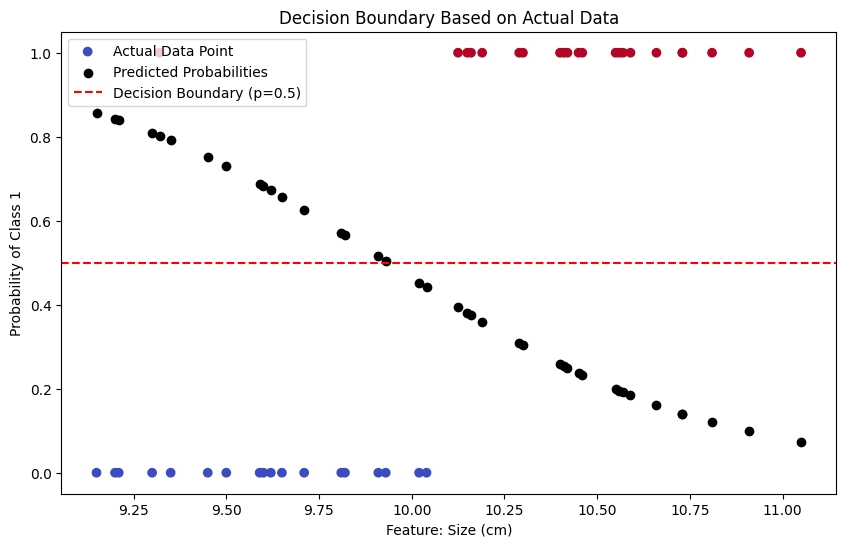

In [25]:
y_prob = lreg.predict_proba(x)[:,0]

plt.figure(figsize=(10,6))

plt.scatter(df['size(cm)'],y,c=y,cmap='coolwarm',label='Actual Data Point')

plt.scatter(df['size(cm)'],y_prob,color='black',label='Predicted Probabilities')

plt.axhline(0.5, color='red', linestyle='--', label="Decision Boundary (p=0.5)")

plt.title("Decision Boundary Based on Actual Data")
plt.xlabel("Feature: Size (cm)")
plt.ylabel("Probability of Class 1")
plt.legend()
plt.show()